<a href="https://colab.research.google.com/github/thirukumaran007/AI-Virtual-Assistant/blob/master/Project_Zeus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install earthpy gdal

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 994 kB 32.8 MB/s 
     |████████████████████████████████| 19.3 MB 58 kB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.6 MB 20.6 MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-py3-none-any.whl size=1365096 sha256=8c86a2bfa5ea2da5d6cfbd89692ba5b1e4a4e0352f5013e691d548ad287fb4af
  Stored in directory: /root/.cache/pip/wheels/80/4d/12/9d924aa338ecb211c35e6fff47330e3f6d14b8c74971c527ca
Successfully built earthpy


In [2]:
 
#import required nodules
from glob import glob
 
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
 
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
 
import plotly.graph_objects as go
 
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Satellite_data

/content/drive/My Drive/Satellite_data


In [5]:
before_floods_data_path = "Madagascar_18_01_2017/"
during_floods_data_path = "Madagascar_27_01_2020/"
a = "b"

In [6]:
#read the data of before Flood
before_floods = glob("/content/drive/My Drive/Satellite_data/Madagascar_18_01_2017/*B?*.tiff")
before_floods.sort()
before_floods

['/content/drive/My Drive/Satellite_data/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B01_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B02_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B03_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B04_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B07_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B08_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_18_01_2017/2017-01-18-00_00_2017-01-18-23_59_Landsat_8_(USGS_archive)_B09_(Raw).tiff',
 '/content/drive/My Drive/S

In [7]:
#read data After Flood
during_floods = glob("/content/drive/My Drive/Satellite_data/Madagascar_27_01_2020/*B?*.tiff")
during_floods.sort()
during_floods

['/content/drive/My Drive/Satellite_data/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B01_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B02_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B03_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B04_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B05_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B06_(Raw).tiff',
 '/content/drive/My Drive/Satellite_data/Madagascar_27_01_2020/2020-01-27-00_00_2020-01-27-23_59_Landsat_8_(USGS_archive)_B07_(Raw).tiff',
 '/content/drive/My Drive/S

In [8]:
#before
l = []
for i in before_floods:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))
 
arr_bef = np.stack(l)

In [9]:
arr_bef.shape

(9, 602, 676)

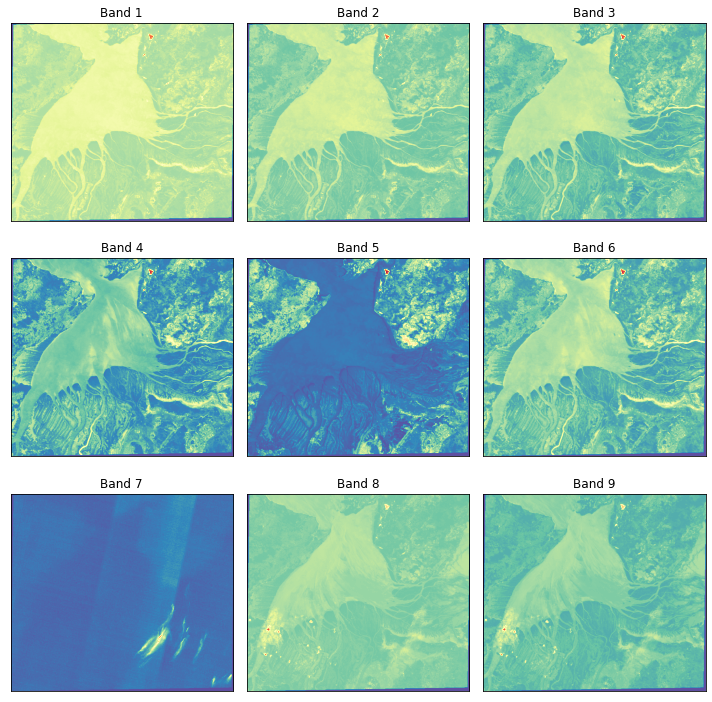

In [10]:
# Visalize Bands
 
ep.plot_bands(arr_bef, cmap='Spectral_r', cols=3, figsize=(10, 10), cbar=False)
 
plt.show()

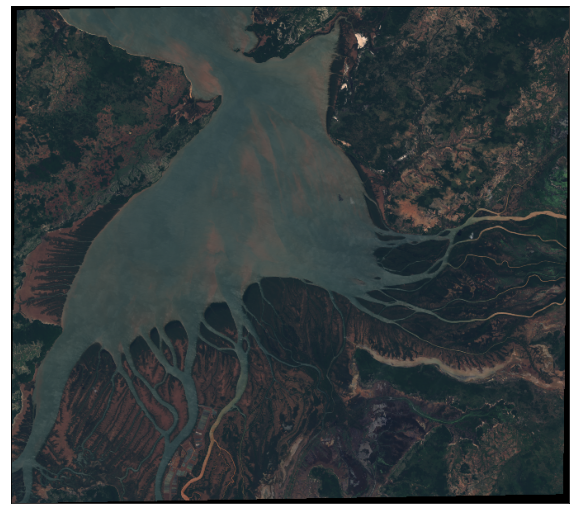

In [29]:
# Visualize RGB Composite Image
 
ep.plot_rgb(arr_bef, rgb=(3, 2, 1), figsize=(10, 10))
 
plt.show()

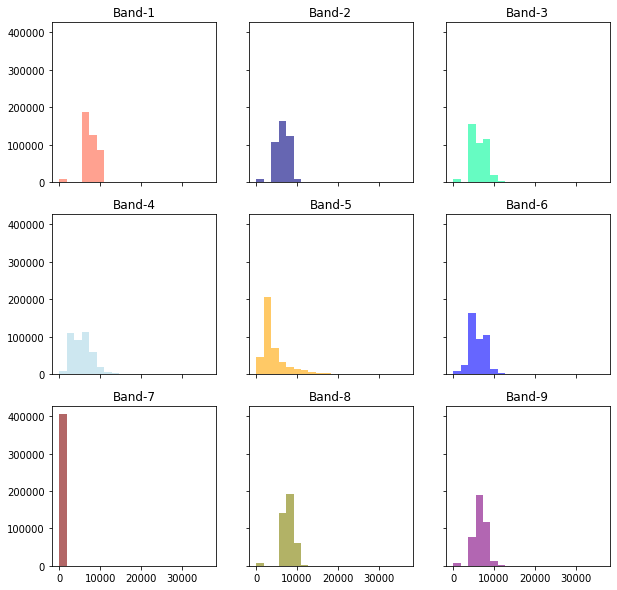

In [34]:
#Data Distribution of Bands
 
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'olive', 'purple']#'yellow'  'brown', 'cyan'
 
ep.hist(arr_bef, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 10)], 
        cols=3, 
        alpha=0.6, 
        figsize = (10,10)
        )
 
plt.show()

In [35]:
#Preprocessing
 
x = np.moveaxis(arr_bef, 0, -1)
x.shape

(602, 676, 9)

In [38]:
 
x.reshape(-1, 9).shape, 954*298

((406952, 9), 284292)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
X_data = x.reshape(-1, 9)
 
scaler = StandardScaler().fit(X_data)
 
X_scaled = scaler.transform(X_data)
 
X_scaled.shape

(406952, 9)

In [61]:
#Principal Component Analysis (PCA)
pca = PCA(n_components = 4)
 
pca.fit(X_scaled)
 
data = pca.transform(X_scaled)

In [62]:
 
data.shape

(406952, 4)

In [63]:
pca.explained_variance_ratio_

array([0.6824427 , 0.13505259, 0.10045344, 0.05284745])

In [64]:
np.sum(pca.explained_variance_ratio_)

0.9707961888843217

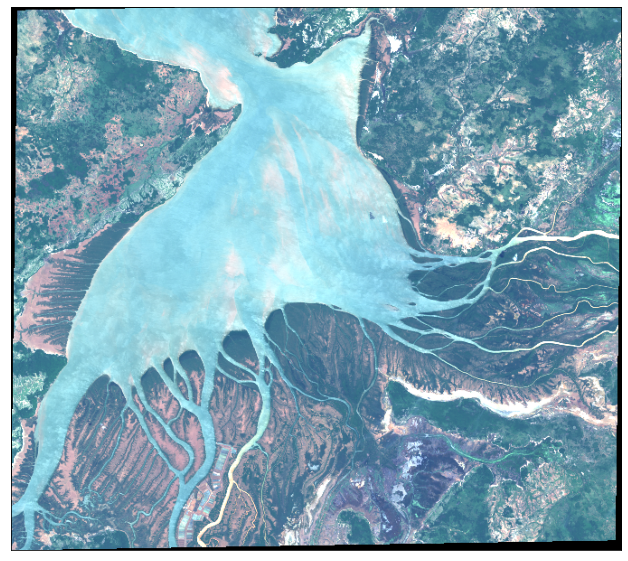

In [72]:
 
ep.plot_rgb(
    arr_bef,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=1.8,
    figsize=(18, 10),
    # title="RGB Composite Image with Stretch Applied",
)
 
plt.show()

In [73]:
data.shape

(406952, 4)

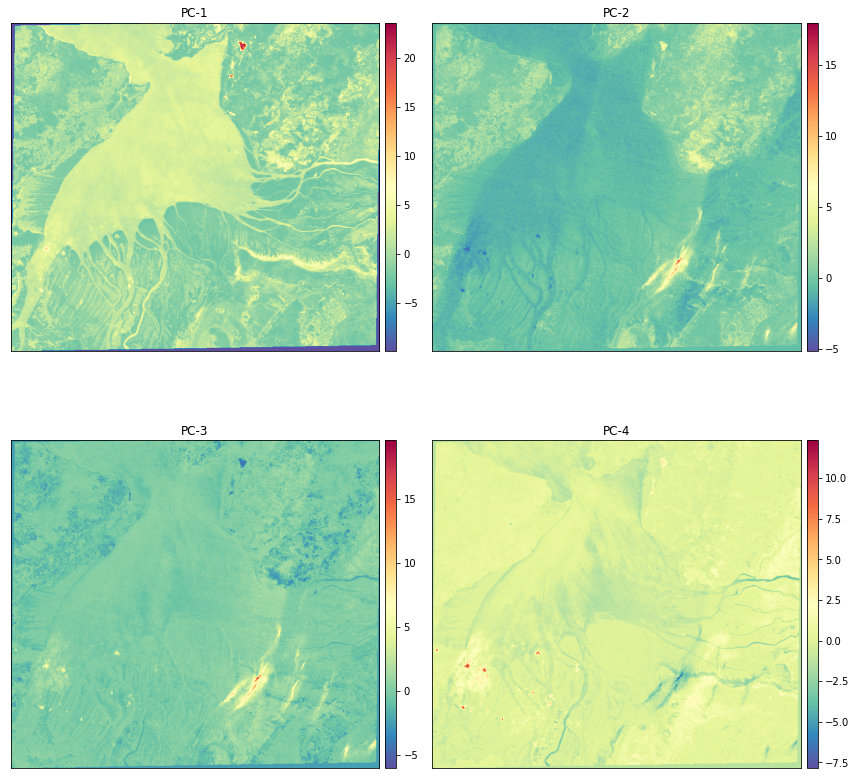

In [84]:
#Visualize Bands after PCA
 
ep.plot_bands(np.moveaxis(data.reshape((602 , 676, data.shape[1])), -1, 0),
              cmap = 'Spectral_r',
              cols = 2,
              title = [f'PC-{i}' for i in range(1,5)])
 
plt.show()

In [85]:
#k - Means
 
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters = 6, random_state = 11)
 
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [86]:
labels = kmeans.predict(data)
 
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

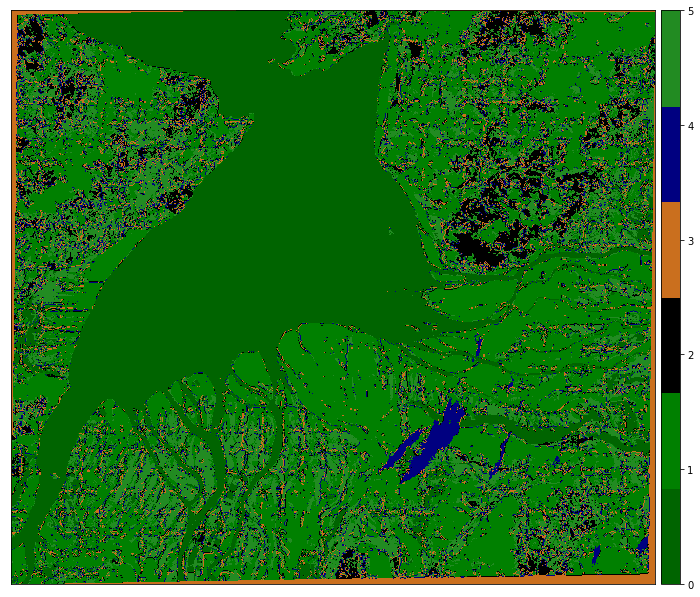

In [87]:
#Visualize Clusters
 
ep.plot_bands(labels.reshape(602 , 676), cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

In [93]:
#Normalized Difference Water Index
#NDWI = (NIR – SWIR) / (NIR + SWIR)

In [94]:
# NIR - 5
# SWIR - 6, 7
 
ndwi_bef = es.normalized_diff(arr_bef[5, :, :], arr_bef[7, :, :])

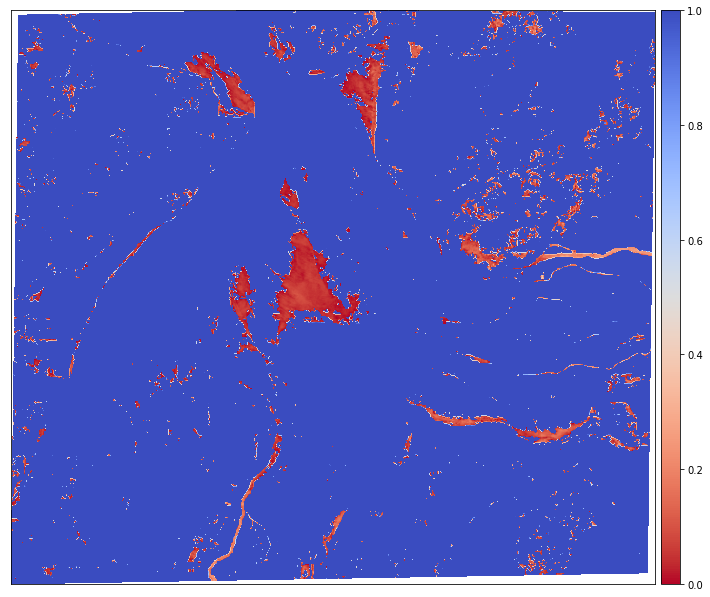

In [95]:
ep.plot_bands(ndwi_bef, cmap='coolwarm_r', vmin=0, vmax=1)
 
plt.show()

In [90]:
#After Flood
l = []
for i in during_floods:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))
 
arr_dur = np.stack(l)

In [91]:
arr_dur.shape

(9, 602, 676)

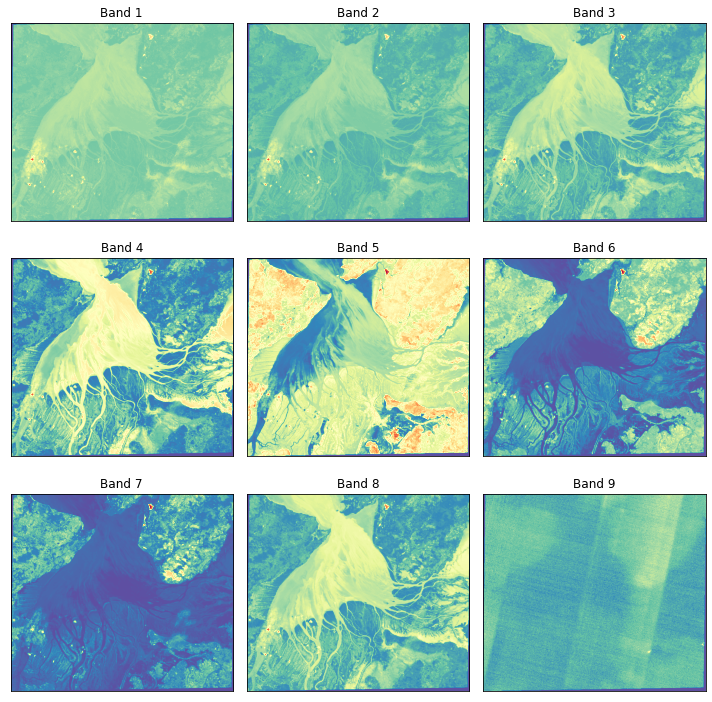

In [96]:
# Visalize Bands
 
ep.plot_bands(arr_dur, cmap='Spectral_r', cols=3, figsize=(10, 10), cbar=False)
 
plt.show()

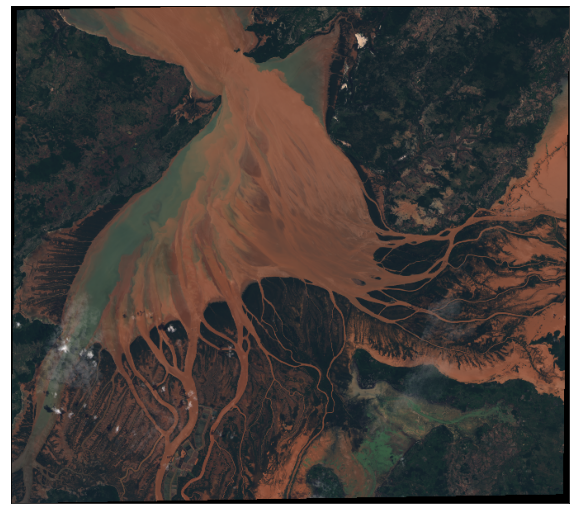

In [97]:
# Visualize RGB Composite Image
 
ep.plot_rgb(arr_dur, rgb=(3, 2, 1), figsize=(10, 10))
 
plt.show()

In [98]:
# NIR - 5
# SWIR - 6, 7
 
ndwi_dur = es.normalized_diff(arr_dur[5, :, :], arr_dur[7, :, :])

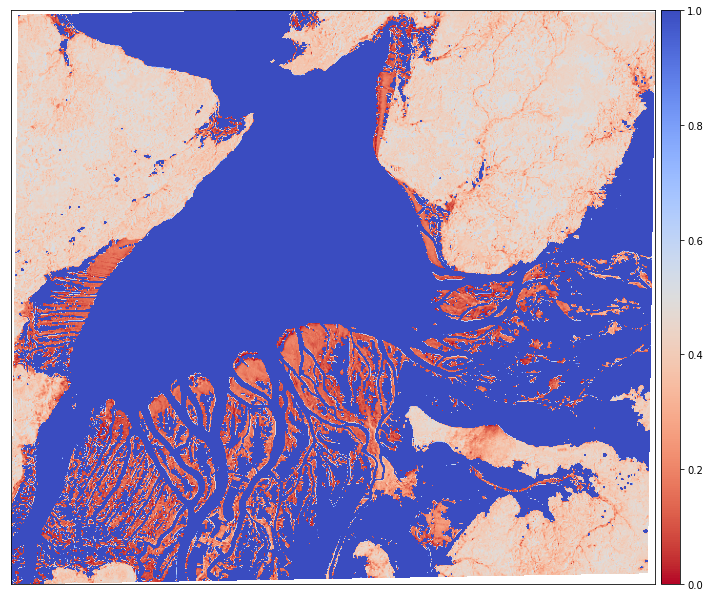

In [99]:
ep.plot_bands(ndwi_dur, cmap='coolwarm_r', vmin=0, vmax=1)
 
plt.show()

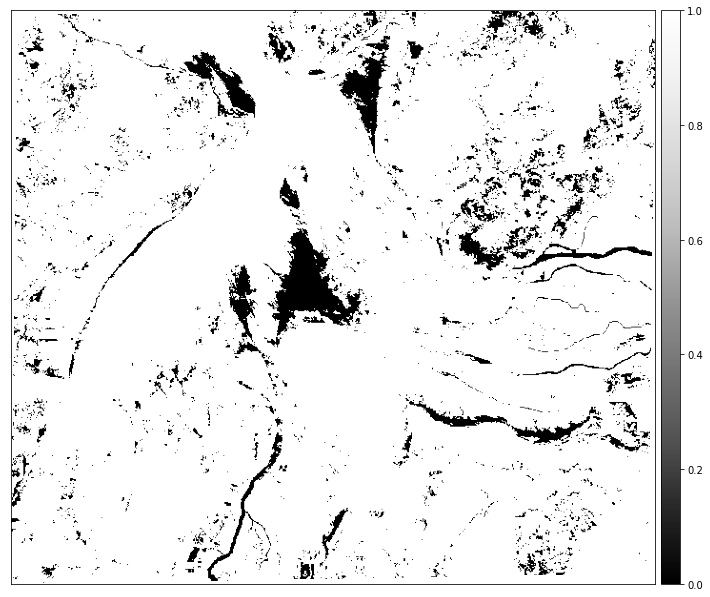

In [100]:
#Flood Mapping
# Mask the data into water and non water pixels based on a threshold value(0.6)
 
mask_bef = (ndwi_bef > 0.6).astype(int)
 
ep.plot_bands(mask_bef, cmap='Greys_r', figsize=(12, 12))
plt.show()

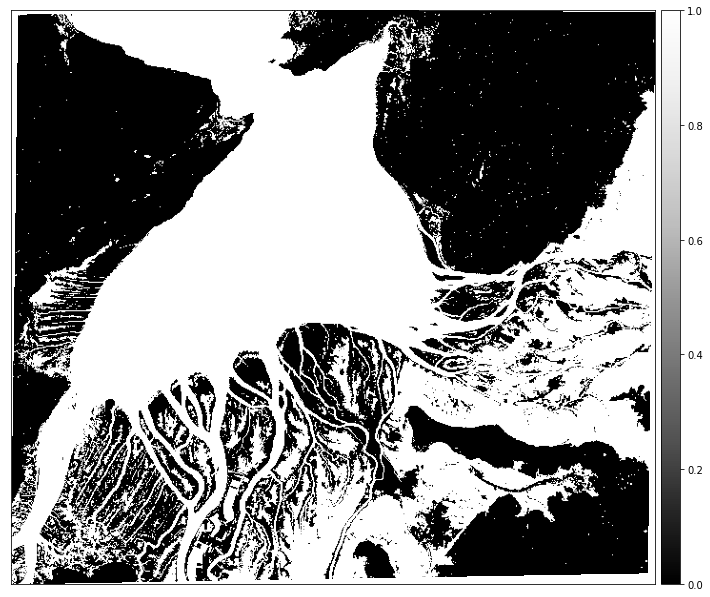

In [101]:
 # Mask the data into water and non water pixels based on a threshold value(0.6)
 
mask_dur = (ndwi_dur > 0.6).astype(int)
 
ep.plot_bands(mask_dur, cmap='Greys_r', figsize=(12, 12))
plt.show()

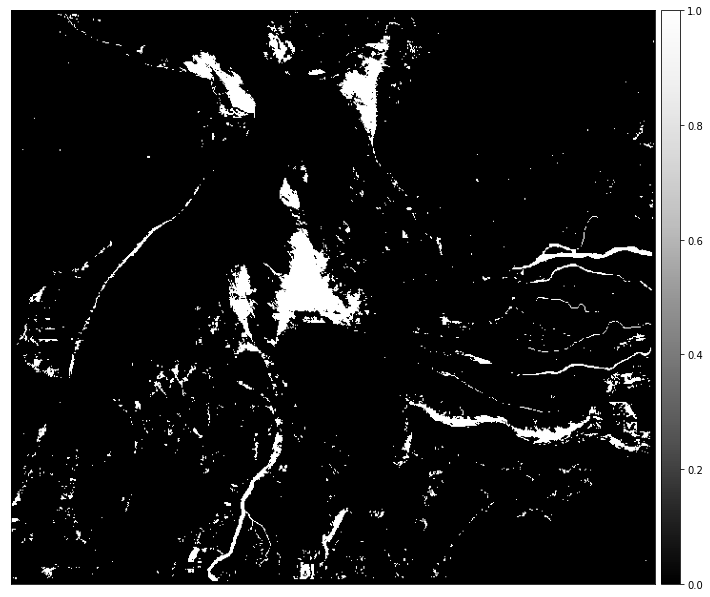

In [102]:
mask_diff = (mask_dur - mask_bef)
 
mask_diff = np.where(mask_diff <0, 0, mask_diff)
 
 
ep.plot_bands(mask_diff, cmap='Greys_r', figsize=(12, 12))
plt.show()

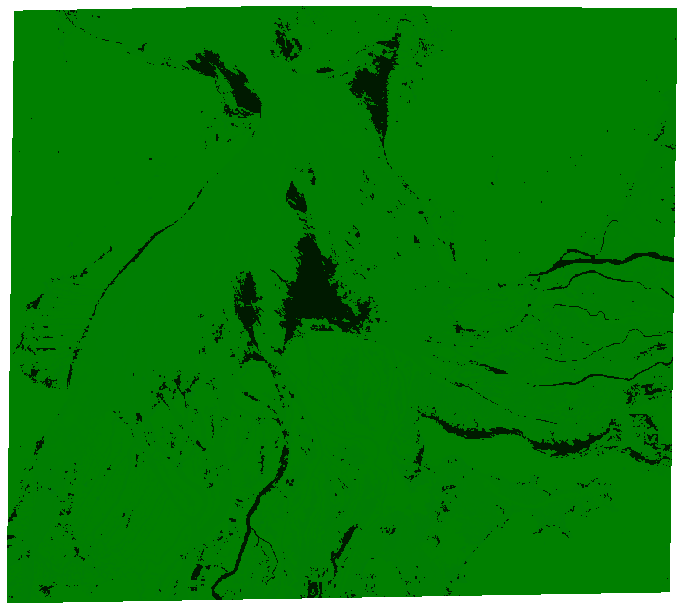

In [103]:
#colour conversion
from matplotlib.colors import colorConverter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
 
# create dummy data
zvals = ndwi_dur
zvals2 = mask_diff
 
# generate the colors for your colormap
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')
 
# make the colormaps
cmap1 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['green','blue'],256)
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)
 
cmap2._init() # create the _lut array, with rgba values
 
# create your alpha array and fill the colormap with them.
# here it is progressive, but you can create whathever you want
alphas = np.linspace(0, 0.8, cmap2.N+3)
cmap2._lut[:,-1] = alphas
 
fig = plt.figure(figsize=(12, 12)) 
plt.imshow(zvals, interpolation='nearest', cmap= cmap1, )
plt.imshow(zvals2, interpolation='nearest', cmap=cmap2, label='flood')
# plt.colorbar()
plt.axis('off')
 
# patches = mpatches.Patch(color=cmap2, label="Flood")
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.show()

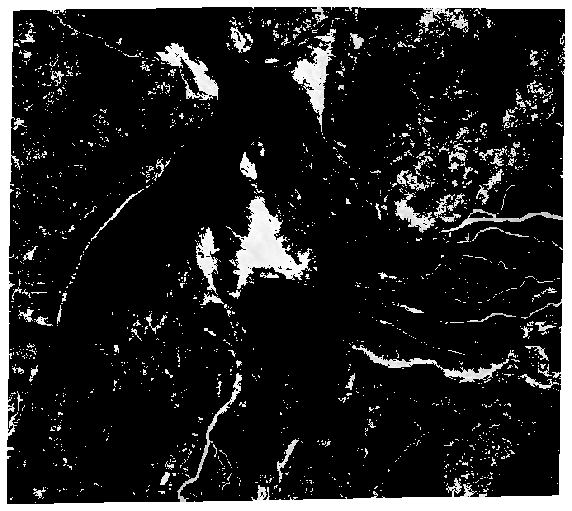

In [104]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(ndwi_bef, vmin=0, vmax=1, cmap='gray_r', interpolation='none')
 
plt.axis('off')
plt.show()

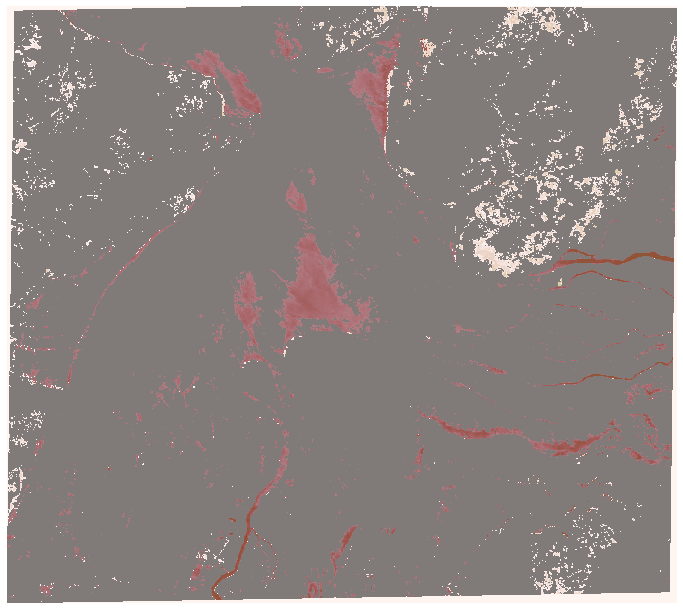

In [105]:
fig = plt.figure(figsize=(12, 12))
 
plt.imshow(mask_diff, vmin=0, vmax=1, cmap='Reds', interpolation='none')
plt.imshow(ndwi_bef, vmin=0, vmax=1, cmap='gist_earth_r', interpolation='none', alpha=0.5)
 
plt.axis('off')
plt.show()

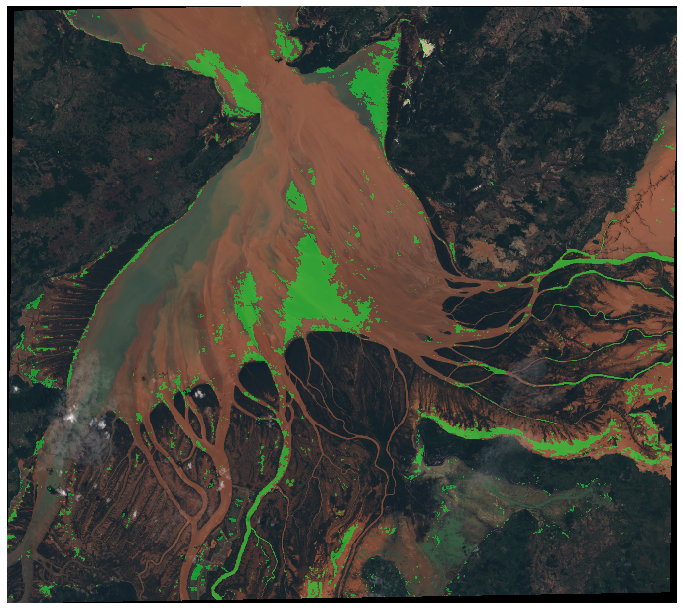

In [108]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(12, 12))
 
rgb = np.moveaxis(np.stack([l[3], l[2], l[1]]), 0, -1)
Image = rgb/np.amax(rgb)
Image = np.clip(Image, 0, 1)
 
 
plt.imshow(Image, interpolation='none')
plt.imshow(mask_diff, vmin=0, vmax=1, 
           cmap=ListedColormap(['#ffffff00', '#00FF33']), 
           interpolation='none' , alpha=0.5)
 
plt.axis('off')
# plt.savefig('flood_result.png', dpi=400)
 
plt.show()